In [58]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,  classification_report

#загрузка данных
path = 'online_shoppers_intention.csv'
data = pd.read_csv (path)
"""
#проверка на пропущенные значения
print ('Пропущенные значения до обработки:')
print (data.isnull().sum())"""

#заполнение пропущенных значений (числовые заполняем средним значением, категориальные - модой)
for col in data:
  data[col] = data[col].fillna(data[col].mean() if data[col].dtype in ['int64', 'float64'] else data[col].mode()[0])

#кодируем категориальные признаки
label_encoders = {}
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col].astype(str))
  label_encoders[col] = le

#разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue'].astype(int)

#разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3,random_state=42)

#инициализируем модели
gb_clf = GradientBoostingClassifier(random_state=42)
ada_clf = AdaBoostClassifier (random_state=42)
dt_clf = DecisionTreeClassifier (random_state=42)
et_clf = ExtraTreesClassifier(random_state=42)
kn_clf = KNeighborsClassifier (n_neighbors=3)

#обучаем модель
gb_clf.fit (X_train, y_train)
ada_clf.fit (X_train, y_train)
dt_clf.fit (X_train, y_train)
et_clf.fit (X_train, y_train)
kn_clf.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
#прогнозирование и оценка точности

#GradientBoostingClassifier
y_pred_gb = gb_clf.predict (X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'GradientBoosting')
print(f'Accuracy:{accuracy_gb:.2f}')
report = classification_report (y_test, y_pred_gb)
print(report)

#AdaBoostClassifier
y_pred_ada = ada_clf.predict (X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'\nAdaBoosting')
print(f'Accuracy:{accuracy_ada:.2f}')
report = classification_report (y_test, y_pred_ada)
print(report)

#DecisionTreeClassifier
y_pred_dt = dt_clf.predict (X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'\nDecisionTree')
print(f'Accuracy:{accuracy_dt:.2f}')
report = classification_report (y_test, y_pred_dt)
print(report)

#ExtraTreesClassifier
y_pred_et = et_clf.predict (X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print(f'\nExtraTree')
print(f'Accuracy:{accuracy_et:.2f}')
report = classification_report (y_test, y_pred_et)
print(report)

#KNeighborsClassifier
y_pred_kn = kn_clf.predict (X_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)
print(f'\nKNeighbors')
print(f'Accuracy:{accuracy_kn:.2f}')
report = classification_report (y_test, y_pred_kn)
print(report)



GradientBoosting
Accuracy:0.90
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3124
           1       0.69      0.59      0.64       575

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699


AdaBoosting
Accuracy:0.89
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3124
           1       0.67      0.57      0.61       575

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.77      3699
weighted avg       0.88      0.89      0.89      3699


DecisionTree
Accuracy:0.85
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3124
           1       0.51      0.57      0.54       575

    accuracy                           0.85      3699
   macro avg       0.71      0.73      0.7

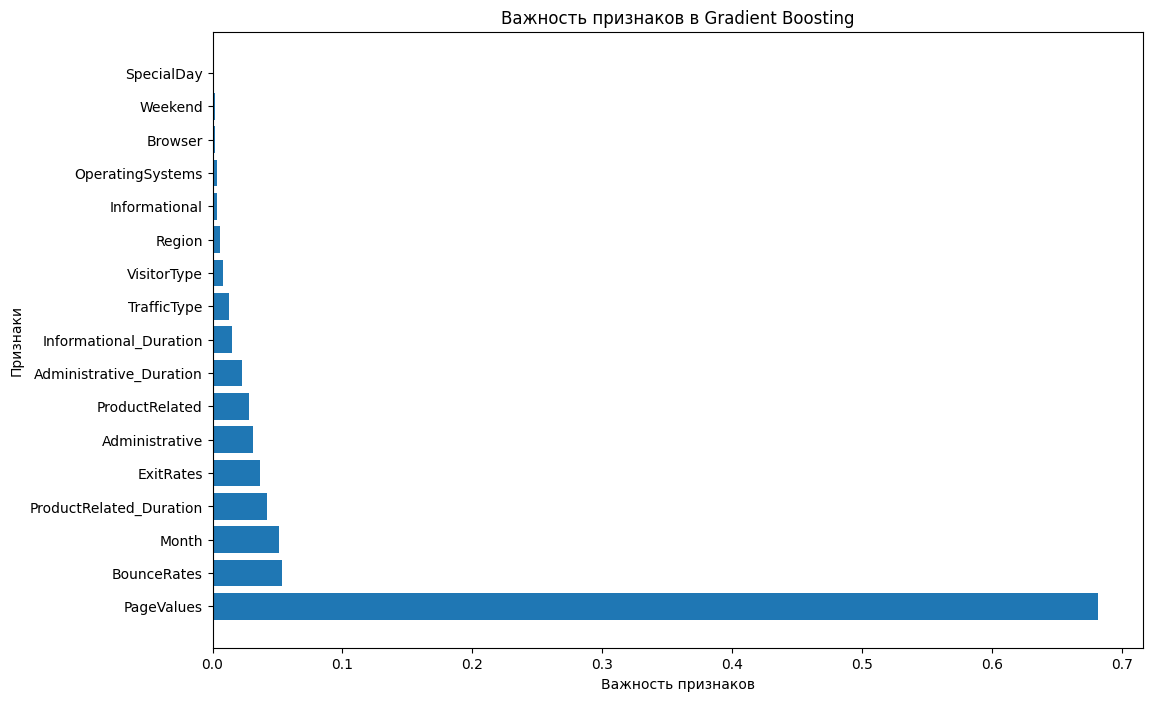

In [45]:
#важность признаков
feature_importance = gb_clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#график важности признаков
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в Gradient Boosting')
plt.show()

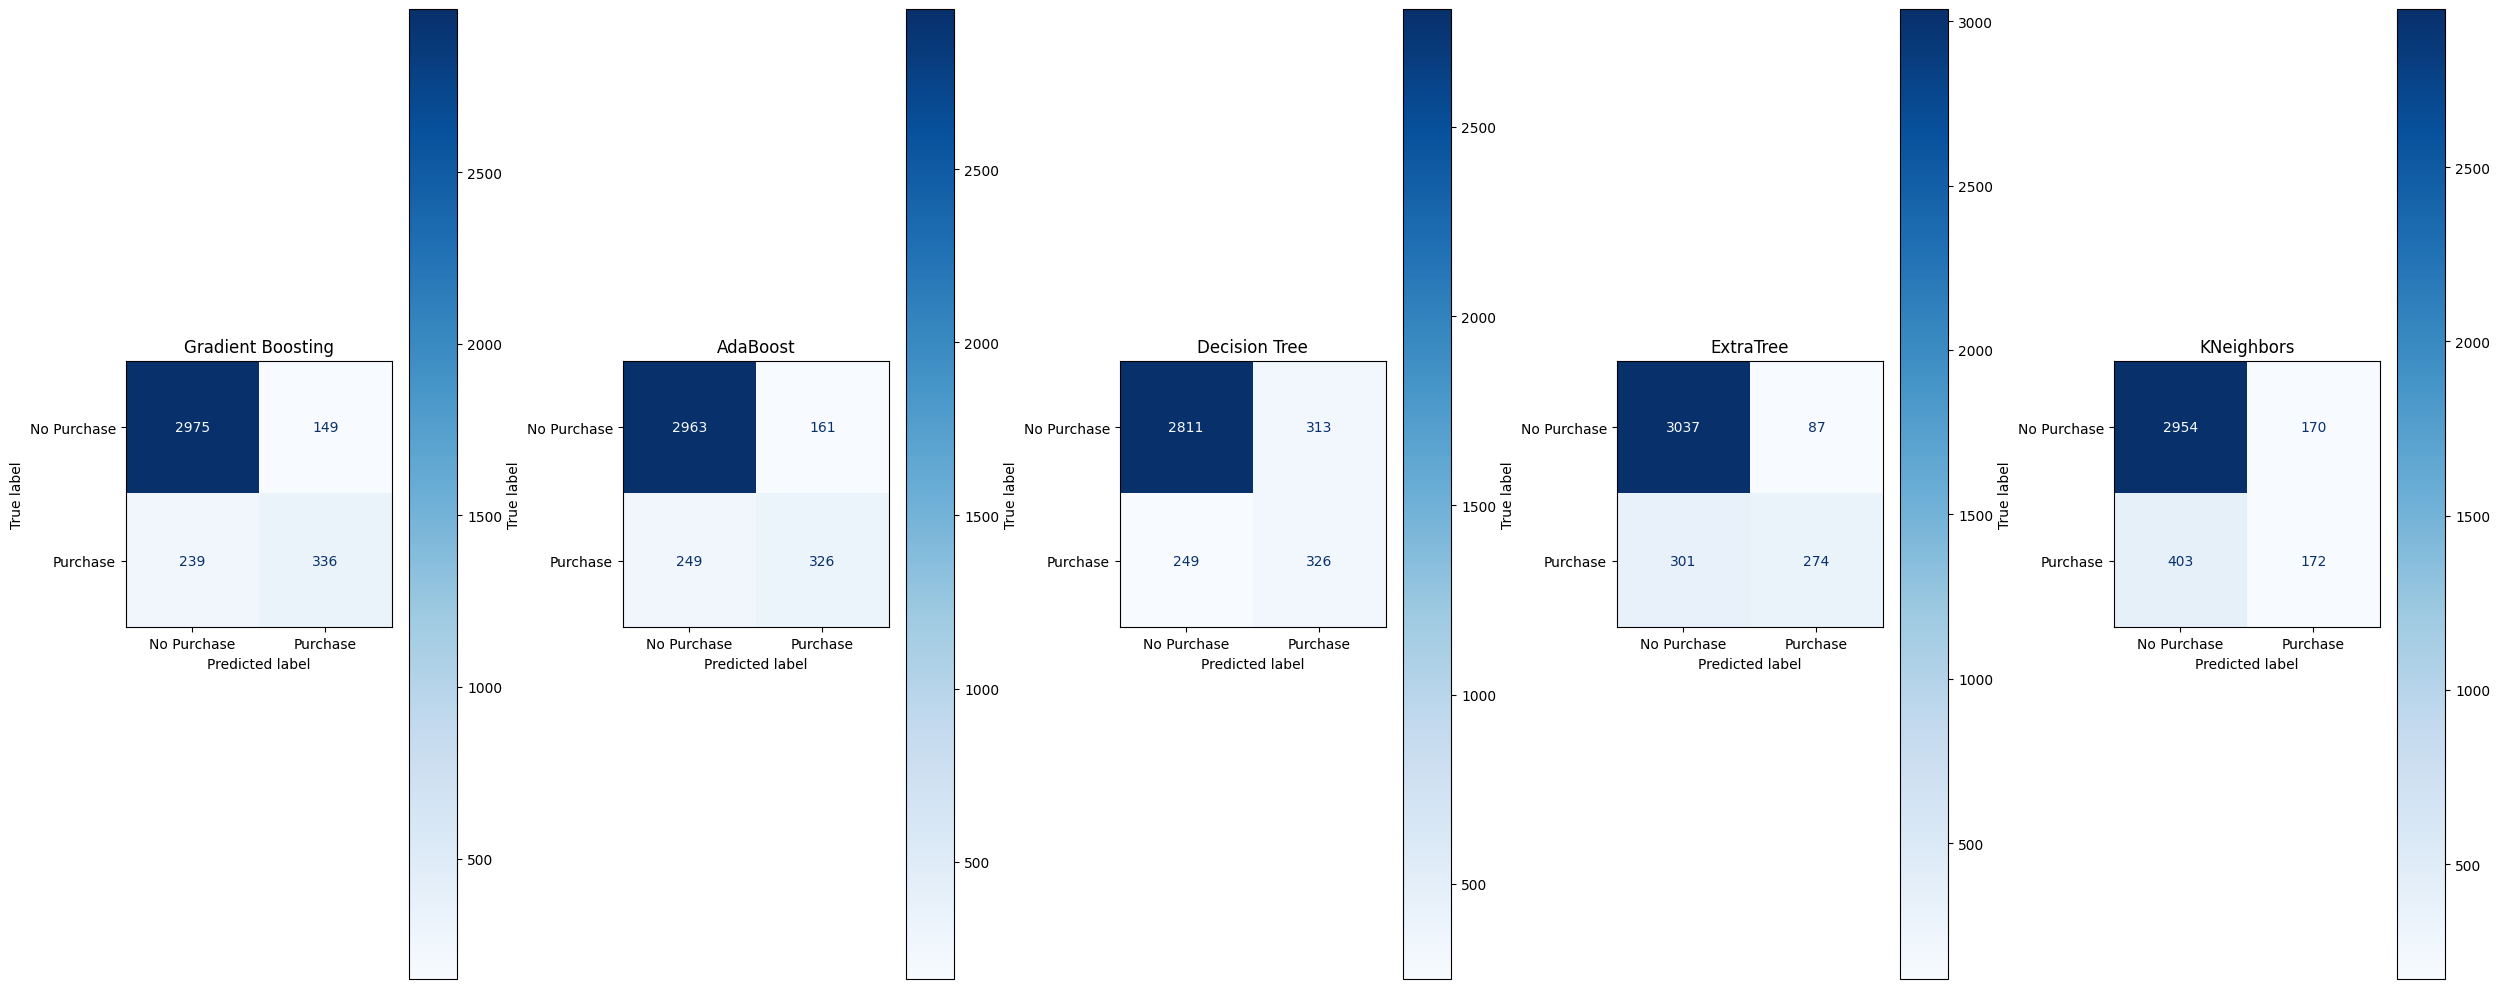

In [60]:
#матрица ошибок
fig, axes = plt.subplots(1, 5, figsize=(25, 10))

models = [('Gradient Boosting', gb_clf), ('AdaBoost', ada_clf), ('Decision Tree', dt_clf), ('ExtraTree', et_clf), ('KNeighbors',kn_clf)]
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Purchase', 'Purchase'])
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name}')

plt.tight_layout()
plt.show()